DE Benchmark (from paper: https://www.pnas.org/doi/full/10.1073/pnas.1901979116)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
GB1_MAX_FITNESS = 8.76196565571
PHOQ_MAX_FITNESS = 133.59427

smw_file_name = '../single_mutation_walk/results_all.pkl'
reccombine_file_name = '../recombine_mutation/results_384.pkl'
nde_file_name = '../de/data/neighborhood_de/results_complete.pkl'
#dm_file_name = '../de/data/neighborhood_de/results_distmax_1-5000.pkl'
dm_file_name = '../de/data/neighborhood_de/with_history/results_sample_1000_02.pkl'
dm_fitness_progressions_file = '../de/data/neighborhood_de/with_history/results_sample_1000_02_fitness_progressions.pkl'

with open(smw_file_name, 'rb') as f:
    smw_start_variants, smw_final_variants, smw_fitness_progressions = pickle.load(f)
with open(reccombine_file_name, 'rb') as f:
    recombine_best_variants, recombine_fitness_progressions = pickle.load(f)
with open(nde_file_name, 'rb') as f:
    nde_final_fitnesses, nde_screened = pickle.load(f)
with open(dm_file_name, 'rb') as f:
    dm_final_fitnesses, dm_screened = pickle.load(f)
with open(dm_fitness_progressions_file, 'rb') as f:
    dm_fitness_progressions = np.array(pickle.load(f)[0]) * GB1_MAX_FITNESS

smw_phoq_file_name = '../single_mutation_walk/results_phoq_all.pkl'
reccombine_phoq_file_name = '../recombine_mutation/results_phoq_384.pkl'
nde_phoq_file_name = '../de/data/PhoQ/neighborhood_de/results_1-22000.pkl'
dm_phoq_file_name = '../de/data/PhoQ/neighborhood_de/with_history/results_sample_1000.pkl'

with open(smw_phoq_file_name, 'rb') as f:
    smw_phoq_start_variants, smw_phoq_final_variants, smw_phoq_fitness_progressions = pickle.load(f)
with open(reccombine_phoq_file_name, 'rb') as f:
    recombine_phoq_best_variants, recombine_phoq_fitness_progressions = pickle.load(f)
with open(nde_phoq_file_name, 'rb') as f:
    nde_phoq_final_fitnesses, nde_phoq_screened = pickle.load(f)
with open(dm_phoq_file_name, 'rb') as f:
    dm_phoq_final_fitnesses, dm_phoq_screened = pickle.load(f)

In [47]:
N_BINS = 40
RANGE = [0., max([smw_fitness_progressions[i][-1] for i in range(len(smw_fitness_progressions))])]
MAX_FITNESS = 8.76196565571

all_counts = []
all_bins = []
all_bin_centers = []

all_sorted_fitnesses = []
all_cdf_values = []

colors = []
labels = []

def prepare_fitness(fitness_progressions):
    final_fitnesses = []
    for proression in fitness_progressions:
        final_fitnesses.append(proression[-1])

    return final_fitnesses

def prepare_hist_data(final_fitnesses):
    counts, bins = np.histogram(final_fitnesses, bins=N_BINS, range=RANGE)
    counts = counts / sum(counts)

    all_counts.append(counts)
    all_bins.append(bins)
    all_bin_centers.append((bins[:-1] + bins[1:]) / 2)

def prepare_cdf_data(final_fitnesses):
    final_fitnesses_sorted = np.sort(final_fitnesses)
    n = len(final_fitnesses_sorted)
    cdf_values = 1. * np.arange(n) / (n - 1)

    all_sorted_fitnesses.append(final_fitnesses_sorted)
    all_cdf_values.append(cdf_values)

def prepare_plot_data(final_fitnesses):
    prepare_hist_data(final_fitnesses)
    prepare_cdf_data(final_fitnesses)

prepare_plot_data(prepare_fitness(smw_fitness_progressions))
colors.append(('red', 1))
labels.append('DE: SMW')
prepare_plot_data(prepare_fitness(recombine_fitness_progressions))
colors.append(('blue', 0.75))
labels.append('DE: Recombine')
prepare_plot_data(nde_final_fitnesses * MAX_FITNESS)
colors.append(('green', 0.75))
labels.append('Neighborhood MLDE')
prepare_plot_data(dm_final_fitnesses * MAX_FITNESS)
colors.append(('purple', 1))
labels.append('Distmax')

""" prepare_plot_data(prepare_fitness(smw_phoq_fitness_progressions))
colors.append(('red', 1))
labels.append('DE: SMW')
prepare_plot_data(prepare_fitness(recombine_phoq_fitness_progressions))
colors.append(('blue', 0.75))
labels.append('DE: Recombine')
prepare_plot_data(nde_phoq_final_fitnesses * MAX_FITNESS)
colors.append(('green', 0.75))
labels.append('Neighborhood MLDE PhoQ')
prepare_plot_data(dm_phoq_final_fitnesses * MAX_FITNESS)
colors.append(('purple', 1))
labels.append('Distmax PhoQ') """


" prepare_plot_data(prepare_fitness(smw_phoq_fitness_progressions))\ncolors.append(('red', 1))\nlabels.append('DE: SMW')\nprepare_plot_data(prepare_fitness(recombine_phoq_fitness_progressions))\ncolors.append(('blue', 0.75))\nlabels.append('DE: Recombine')\nprepare_plot_data(nde_phoq_final_fitnesses * MAX_FITNESS)\ncolors.append(('green', 0.75))\nlabels.append('Neighborhood MLDE PhoQ')\nprepare_plot_data(dm_phoq_final_fitnesses * MAX_FITNESS)\ncolors.append(('purple', 1))\nlabels.append('Distmax PhoQ') "

In [48]:
all_means = []
all_medians = []
all_first_q = []
all_third_q = []
for fitness in all_sorted_fitnesses:
    all_means.append(np.mean(fitness))
    all_medians.append(np.median(fitness))
    all_first_q.append(np.quantile(fitness, 0.25))
    all_third_q.append(np.quantile(fitness, 0.75))

print(labels)
print(all_means)
print(all_first_q)
print(all_medians)
print(all_third_q)

['DE: SMW', 'DE: Recombine', 'Neighborhood MLDE', 'Distmax']
[5.348261999780781, 4.3947047344707455, 4.291404860361278, 6.102524931426327]
[4.57422862827, 3.56308335254, 2.22692709534, 5.11062351873]
[5.49487553163, 4.29424290851, 4.922591237149999, 5.77203220934]
[6.87794904259, 5.15691840607, 6.2011354501, 6.2011354501]


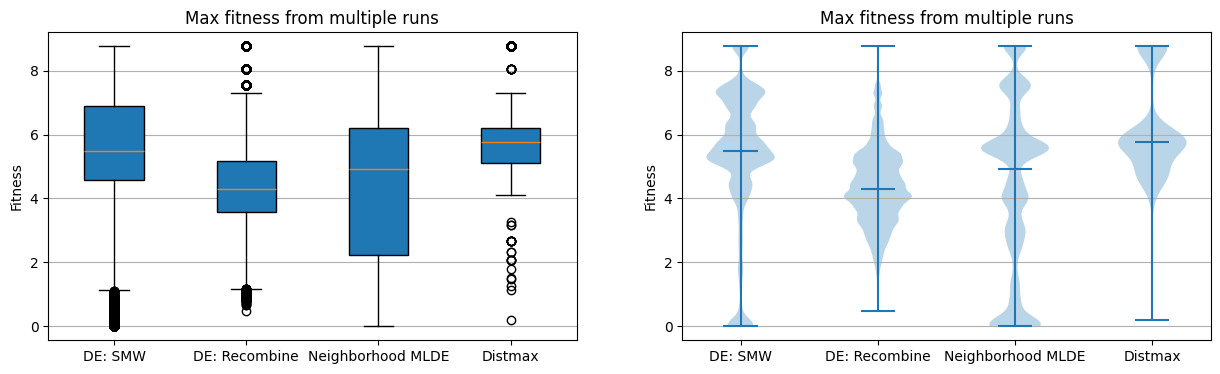

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
bplot = axs[0].boxplot(
    all_sorted_fitnesses,
    vert=True,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=labels,
)

axs[1].violinplot(all_sorted_fitnesses,
                  showmeans=False,
                  showmedians=True)
axs[1].set_title('Violin plot')

for ax in axs:
    ax.set_title("Max fitness from multiple runs")
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_sorted_fitnesses))],
                  labels=labels)
    #ax.set_xlabel('')
    ax.set_ylabel('Fitness')

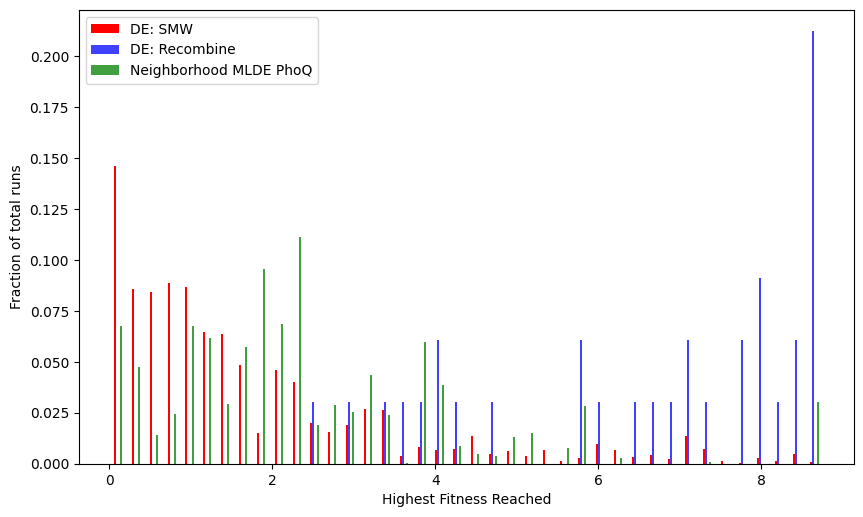

In [11]:
assert len(all_counts) == len(all_bins)
#bar_offsets = [-0.0375, 0.0375]
bar_offsets = [-0.05, -0.025, 0.025, 0.05]

fig = plt.figure(figsize=(10,10))
for i in range(len(all_counts)):
    # plt.stairs(all_counts[i], all_bins[i])
    plt.bar(
        all_bin_centers[i] + bar_offsets[i],
        all_counts[i],
        align="edge",
        width=0.025,
        color=colors[i] if len(colors) > i else None,
    )
plt.legend(labels)
plt.xlabel("Highest Fitness Reached")
plt.ylabel("Fraction of total runs")
#plt.title("Performance of traditional DE methods")
fig.axes[0].set_aspect(25)
plt.show()

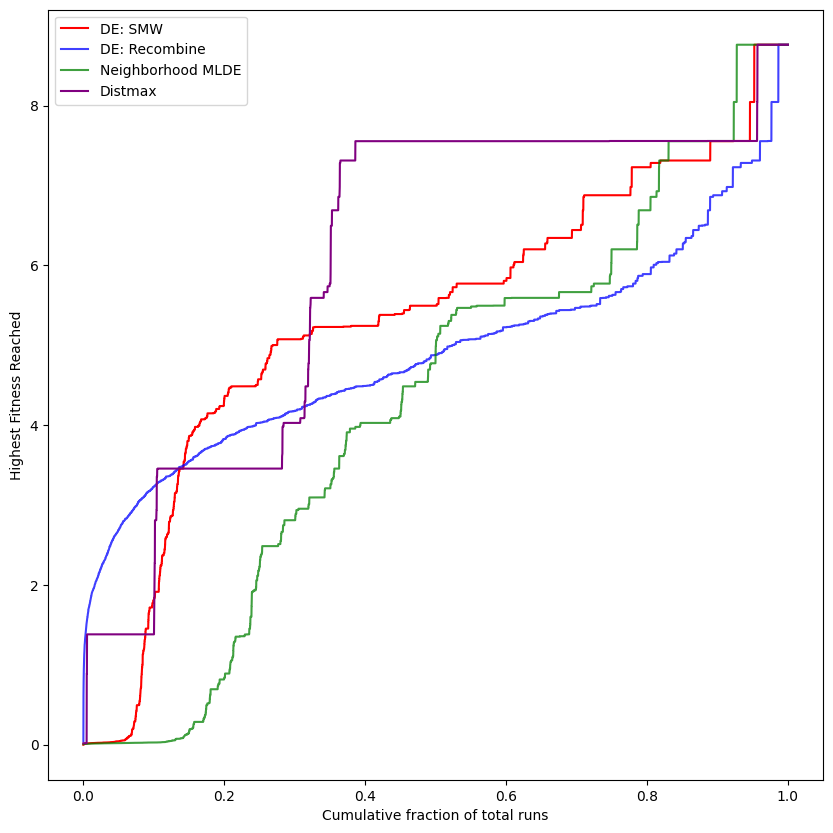

In [19]:
assert len(all_cdf_values) == len(all_sorted_fitnesses)

fig = plt.figure(figsize=(10, 10))
for i in range(len(all_cdf_values)):
    plt.plot(
        all_cdf_values[i],
        all_sorted_fitnesses[i],
        color=colors[i] if len(colors) > i else None,
    )
plt.legend(labels)
plt.xlabel("Cumulative fraction of total runs")
plt.ylabel("Highest Fitness Reached")
#plt.title("Performance of traditional DE methods")
#fig.axes[0].set_aspect(5)
plt.show()

In [3]:
rfpl = []
for i in range(len(recombine_fitness_progressions)):
    rfpl.append(len(recombine_fitness_progressions[i]))
min_rfpl = min(rfpl)
for i in range(len(recombine_fitness_progressions)):
    recombine_fitness_progressions[i] = recombine_fitness_progressions[i][0:min_rfpl]

In [7]:
all_fitness_progressions = []
labels = []

all_fitness_progressions.append(np.array(smw_fitness_progressions))
labels.append('DE: SMW')

all_fitness_progressions.append(np.array(recombine_fitness_progressions))
labels.append('DE: Recombine')

all_fitness_progressions.append(dm_fitness_progressions)
labels.append('Distmax')

single_fitness_progressions = []
single_labels = []

with open('../de/data/mlde_output_distmax_01/fitness_progression.pkl', 'rb') as f:
    mlde_od_fitness_progression = pickle.load(f)[0] * GB1_MAX_FITNESS
single_fitness_progressions.append(mlde_od_fitness_progression)
single_labels.append('MLDE Output distmax')

with open('../de/data/gpde/gp_190_fitness_progression.pkl', 'rb') as f:
    gpde_fitness_progression = pickle.load(f)[0] * GB1_MAX_FITNESS
single_fitness_progressions.append(gpde_fitness_progression)
single_labels.append('GPDE')

with open('../de/data/neighborhood_de/wt_fitness_progression.pkl', 'rb') as f:
    dmwt_fitness_progression = pickle.load(f)[0] * GB1_MAX_FITNESS
single_fitness_progressions.append(dmwt_fitness_progression)
single_labels.append('Distmax WT')

In [9]:
with open('../de/data/neighborhood_de/history_esm1b_wt.pkl', 'rb') as f:
    dmwt = pickle.load(f)

In [11]:
dmwt

[['VDGV',
  'HHHH',
  'KKKK',
  'RRFL',
  'CCCD',
  'WWWW',
  'PPRR',
  'QCQG',
  'CIII',
  'DDDD',
  'IDGV',
  'VEGV',
  'VDGI',
  'LDGV',
  'VDGL',
  'ADGV',
  'AEGV',
  'VDSV',
  'VDGA',
  'VDNV',
  'VGGV',
  'MDGV',
  'VNGV',
  'VESV',
  'VDAV',
  'VEGA',
  'INGV',
  'VSGV',
  'VNGI',
  'LNGV',
  'VQGV',
  'ANGV',
  'VNGL',
  'VTGV',
  'VAGV',
  'VNGA',
  'NTGV',
  'ISGV',
  'IAGV',
  'ASGV',
  'VSGA',
  'INGA',
  'VQGA',
  'LNGA',
  'ANGA',
  'VNGT',
  'VTGA',
  'VAGA',
  'VNSA',
  'VTGQ',
  'NTGA',
  'VGGA',
  'VTGS',
  'VNAS',
  'ISGA',
  'IQGA',
  'FNGA',
  'INGT',
  'MNGA',
  'ITGA',
  'INSA',
  'IAGA',
  'LSGA',
  'YNGA',
  'ITGS',
  'INAS',
  'FSGA',
  'FQGA',
  'FNGT',
  'FTGA',
  'FAGA',
  'FEGA',
  'FTGS',
  'FSNA',
  'FSGT',
  'FGGA',
  'FNSA',
  'FNGV',
  'FVGA',
  'YAGA',
  'FAGT',
  'LAGA',
  'MAGA',
  'FGAA',
  'FASA',
  'FAGS',
  'FAGV',
  'FLGA',
  'FAGN',
  'FVGS',
  'FAGQ',
  'FSGS',
  'YAGS',
  'IAGS',
  'LAGS',
  'MAGS',
  'FNGS',
  'FQGS',
  'FQGT',
  'YSGA',


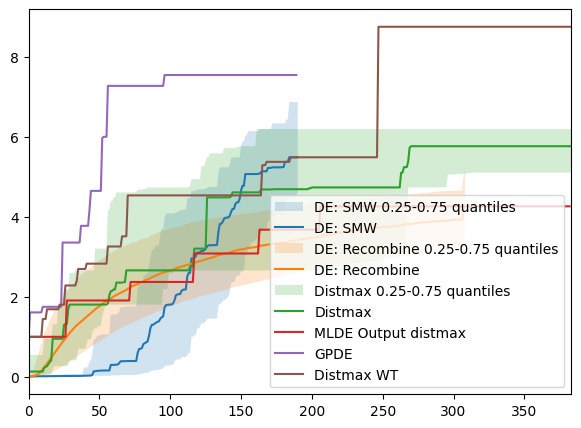

In [8]:
def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    
    #est = np.mean(data, axis=0)
    est = np.median(data, axis=0)
    
    #sd = np.std(data, axis=0)
    #cis = (est - sd, est + sd)
    cis = (np.quantile(data, 0.25, axis=0), np.quantile(data, 0.75, axis=0))

    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

fig, (ax) = plt.subplots(ncols=1, figsize=(7,5), sharey=True)
for fitness_progressions in all_fitness_progressions:
    tsplot(ax, fitness_progressions)
for fitness_progression in single_fitness_progressions:
    ax.plot(np.arange(len(fitness_progression)), fitness_progression)

plot_labels = []
for label in labels:
    plot_labels.append(label + ' 0.25-0.75 quantiles')
    plot_labels.append(label)
for label in single_labels:
    plot_labels.append(label)
plt.legend(plot_labels)

plt.show()